In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
from matplotlib import style
import os 
os.chdir(os.path.dirname(os.getcwd()))
import pandas as pd
import pickle as pkl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
style.use('ggplot')
%matplotlib inline

In [6]:
#temperatures = pkl.load(open('data/output/temperatures_LR_0.1_GAMMA_0.99.pkl', "rb"))
temperatures = pkl.load(open('data/output/temperatures0.1_G_0.99_EPS_0.2_cycle_.pkl', "rb"))

temperatures_df = pd.DataFrame()
temperatures_df['trained'] = temperatures[-1]
temperatures_df['untrained'] = temperatures[0]
temperatures_df['hour'] = pd.to_timedelta(temperatures_df.index, unit='s')


In [7]:
temperatures_df.index = temperatures_df['hour']

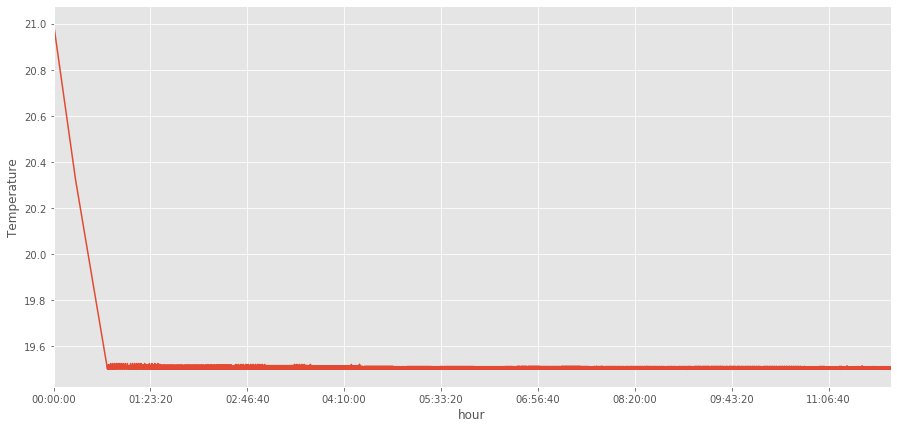

In [8]:
f, ax = plt.subplots(figsize=(15,7))

plt.ylabel('Temperature')
temperatures_df.loc[:,'trained'].plot(ax=ax)

plt.savefig('data/output/temperatures_cycle_constraint.png')

In [2]:
#rewards = pkl.load(open('data/output/rewards_LR_0.1_GAMMA_0.99.pkl', "rb"))
rewards = pkl.load(open('data/output/rewards_LR_0.1_G_0.99_EPS_0.2_cycle_.pkl', "rb"))

rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards

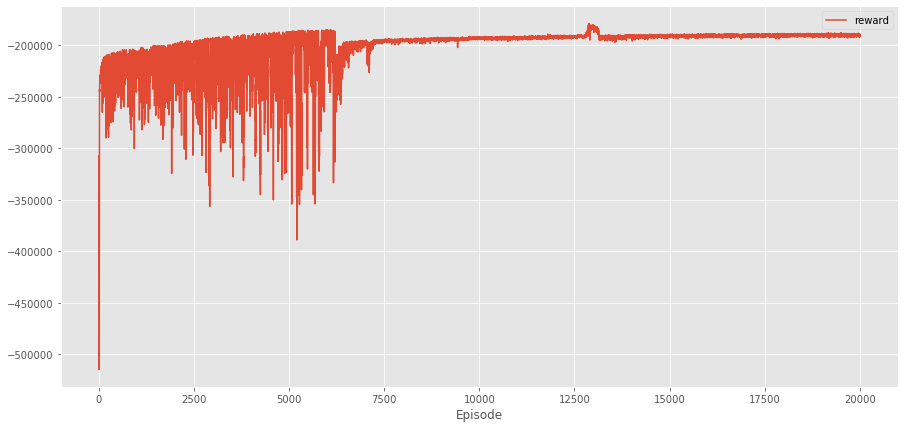

In [5]:
f, ax = plt.subplots(figsize=(15,7))
rewards_df.plot(ax=ax)
plt.xlabel('Episode')
plt.savefig('data/output/rewards_cycle_constraint.png')

In [4]:
rewards[-1]

-190420

In [49]:
temperatures = pkl.load(open('data/output/temperatures_basic.pkl', "rb"))

temperatures_df = pd.DataFrame()
temperatures_df['trained'] = temperatures
temperatures_df['hour'] = pd.to_timedelta(temperatures_df.index, unit='s')

In [50]:
temperatures_df.index = temperatures_df['hour']

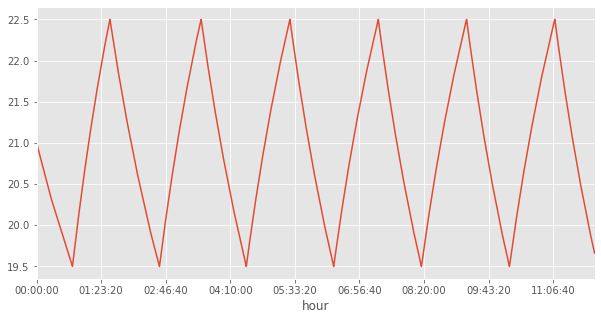

In [27]:
plt.figure(figsize=(10,5))
temperatures_df.loc[temperatures_df['hour'] < pd.to_timedelta(43200, unit='s'),'trained'].plot()

In [ ]:
f, ax = plt.subplots(figsize=(15,7))

plt.ylabel('Temperature')
temperatures_df['trained'].plot(ax=ax)

plt.savefig('data/output/temperatures_basic_controller.png')

In [53]:
rewards = pkl.load(open('data/output/rewards_basic.pkl', "rb"))

rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards

In [54]:
sum(rewards)

-199710

# The learned policy 

In [56]:
q_table = pkl.load(open('q_table_no_cycle.pkl', "rb"))

In [61]:
import numpy as np
policy = {k: np.argmax(v) for k, v in q_table.items()} 

In [68]:
for t in np.arange(19.5, 23, 1/10):
    print('Temperature {} --> action {}'.format(np.round(t, decimals = 1),policy[np.round(t, decimals = 1)]))

Temperature 19.5 --> action 1
Temperature 19.6 --> action 0
Temperature 19.7 --> action 0
Temperature 19.8 --> action 1
Temperature 19.9 --> action 0
Temperature 20.0 --> action 0
Temperature 20.1 --> action 0
Temperature 20.2 --> action 0
Temperature 20.3 --> action 0
Temperature 20.4 --> action 0
Temperature 20.5 --> action 0
Temperature 20.6 --> action 0
Temperature 20.7 --> action 0
Temperature 20.8 --> action 0
Temperature 20.9 --> action 0
Temperature 21.0 --> action 0
Temperature 21.1 --> action 1
Temperature 21.2 --> action 0
Temperature 21.3 --> action 1
Temperature 21.4 --> action 1
Temperature 21.5 --> action 0
Temperature 21.6 --> action 1
Temperature 21.7 --> action 1
Temperature 21.8 --> action 0
Temperature 21.9 --> action 0
Temperature 22.0 --> action 1
Temperature 22.1 --> action 0
Temperature 22.2 --> action 1
Temperature 22.3 --> action 0
Temperature 22.4 --> action 0
Temperature 22.5 --> action 1
Temperature 22.6 --> action 0
Temperature 22.7 --> action 0
Temperatur

# DQN Agent

## No dynamic outside parameters

In [23]:
rewards = pkl.load(open('data/output/basic/3163795_dynamic_False_rewards_dqn.pkl', "rb"))

In [24]:
rewards[-1]

{'NUM_EPISODES': 1000,
 'EPSILON': 1,
 'EPS_DECAY': 0.9998,
 'LEARNING_RATE': 0.00025,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 32,
 'TIME_STEP_SIZE': 600,
 'NUM_HOURS': 744,
 'E_PRICE': 1,
 'COMFORT_PENALTY': 10}

In [25]:
rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards[:-1]

In [29]:
r = rewards_df.fillna(rewards_df.mean())

In [30]:
moving_avg = r.rolling(window=10).mean()

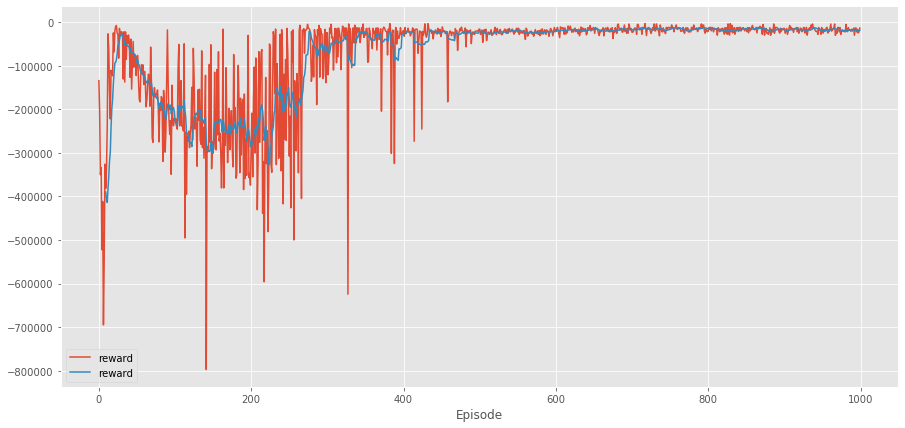

In [31]:
f, ax = plt.subplots(figsize=(15,7))
r.plot(ax=ax)
moving_avg.plot(ax=ax)
plt.xlabel('Episode')
plt.savefig('data/output/rewards_not_dynamic_dqn.png')

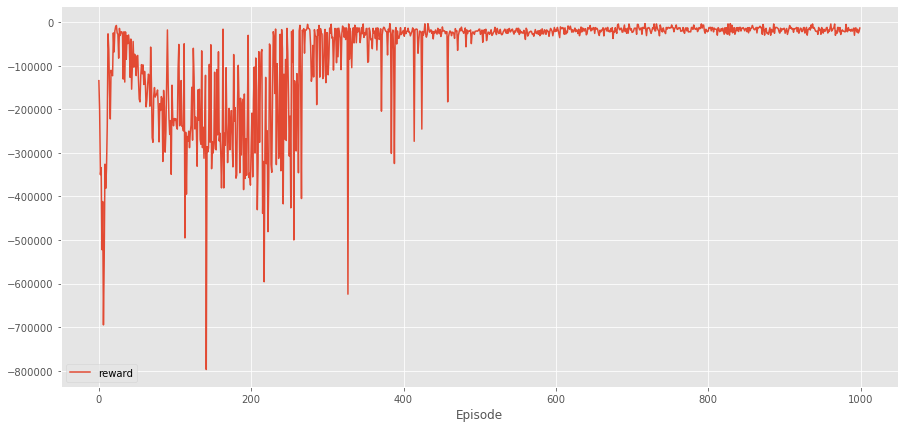

In [26]:
f, ax = plt.subplots(figsize=(15,7))
rewards_df.plot(ax=ax)
plt.xlabel('Episode')
plt.savefig('data/output/rewards_no_dynamic_dqn.png')

In [3]:
temperatures = pkl.load(open('data/output/DQN Not dynamic/2116796_dynamic_False_temperatures_dqn.pkl', "rb"))

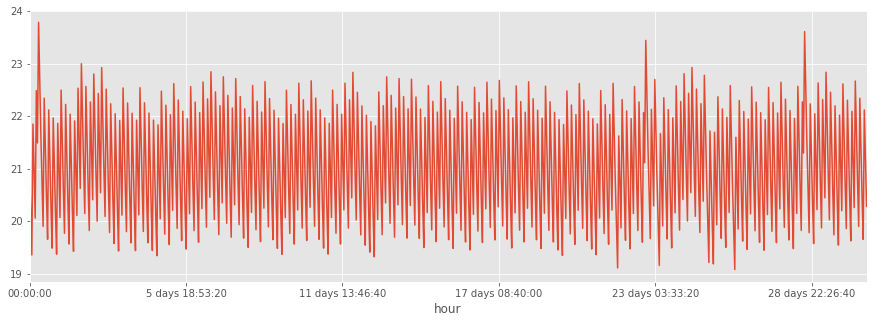

In [28]:
temperatures_df = pd.DataFrame()
temperatures_df['trained'] = temperatures[-2]
temperatures_df['hour'] = pd.to_timedelta(temperatures_df.index, unit='h')

temperatures_df.index = temperatures_df['hour']

plt.figure(figsize=(15,5))
temperatures_df.iloc[:,:].loc[:,'trained'].plot()
plt.savefig('data/output/DQN-Dyn-Price/eval.png',bbox_inches='tight')

## Dynamic outside parameters

In [3]:
rewards = pkl.load(open('data/output/DQN-Dyn-Weather/2710092_dynamic_True_rewards_dqn.pkl', "rb"))

In [4]:
rewards[-1]

{'NUM_EPISODES': 1000,
 'EPSILON': 1,
 'EPS_DECAY': 0.9998,
 'LEARNING_RATE': 0.00025,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 32,
 'TIME_STEP_SIZE': 600,
 'NUM_HOURS': 744,
 'E_PRICE': 1,
 'COMFORT_PENALTY': 2}

In [4]:
rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards[:-1]

In [6]:
r = rewards_df.fillna(rewards_df.mean())

In [7]:
moving_avg = r.rolling(window=10).mean()

Text(0.5, 0, 'Episode')

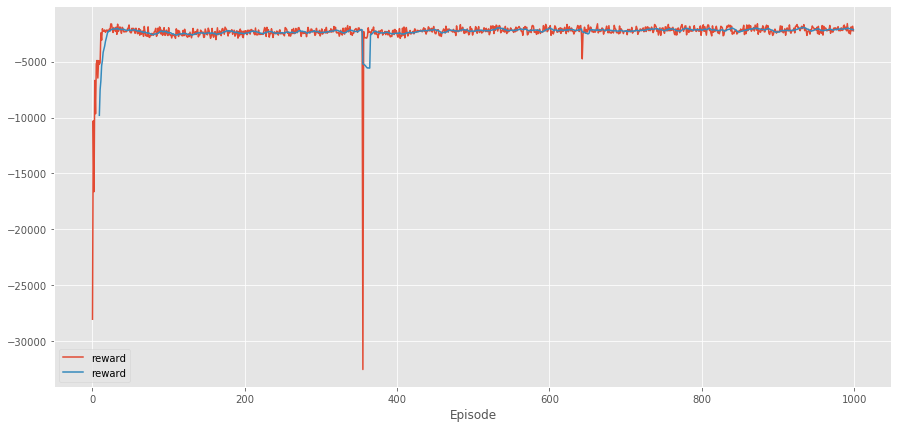

In [8]:
f, ax = plt.subplots(figsize=(15,7))
r.plot(ax=ax)
moving_avg.plot(ax=ax)
plt.xlabel('Episode')
#plt.savefig('data/output/rewards_dynamic_dqn.png')

In [10]:
temperatures = pkl.load(open('data/output/DQN-Dyn-Weather/2622882_dynamic_True_temperatures_dqn.pkl', "rb"))

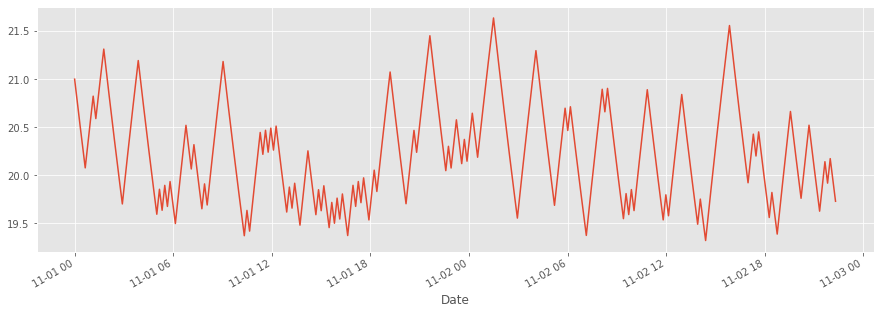

In [33]:
temperatures_df = pd.DataFrame()
temperatures_df['trained'] = temperatures[-3]
temperatures_df['Date'] = pd.date_range(start='2014-11-01',end='2014-12-01', periods=len(temperatures_df['trained']))

temperatures_df.index = temperatures_df['Date']

plt.figure(figsize=(15,5))
temperatures_df.iloc[:48*6,:].loc[:,'trained'].plot()

In [11]:
temperatures[-1]

{'NUM_EPISODES': 2000,
 'EPSILON': 1,
 'EPS_DECAY': 0.9998,
 'LEARNING_RATE': 0.0001,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 32,
 'TIME_STEP_SIZE': 600,
 'NUM_HOURS': 744,
 'E_PRICE': 1,
 'COMFORT_PENALTY': 2}

### Evaluation on January

In [2]:
eval_data = pkl.load(open('data/output/DQN-Dyn-Weather/Dyn_Weather_eval.pkl', 'rb'))
eval_data['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01', periods=len(eval_data))
eval_data.index = eval_data['Date']

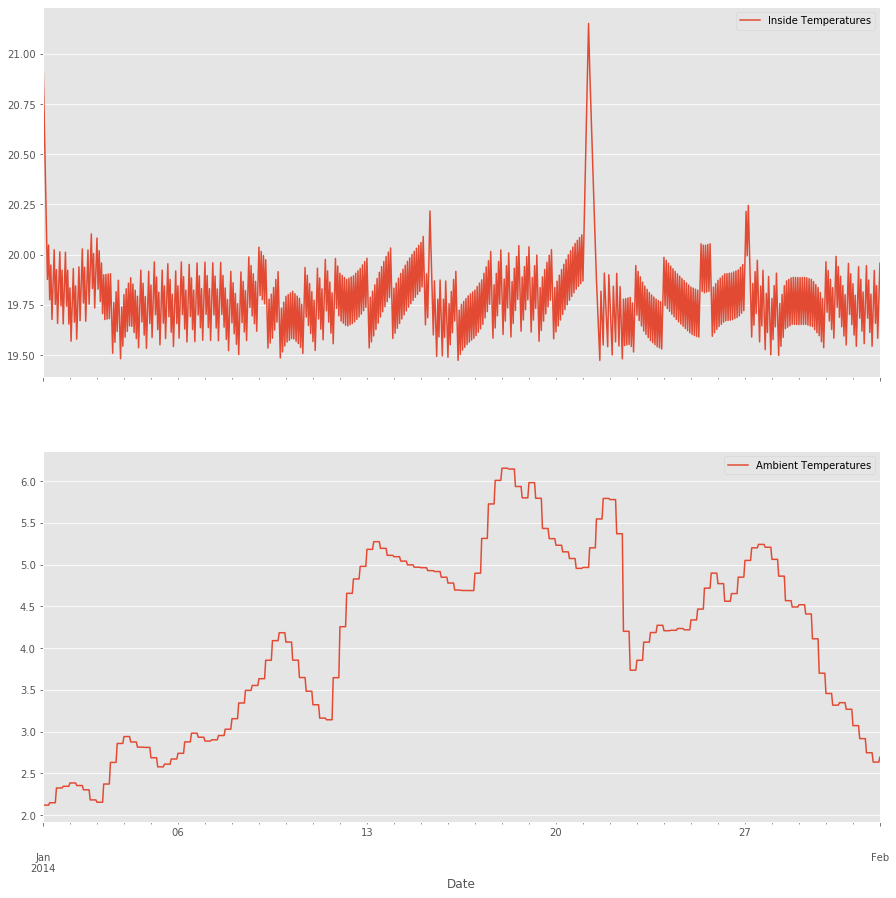

In [4]:
fig, axs = plt.subplots(2,figsize=(15,15), sharex=True)

eval_data['Inside Temperatures'].plot(ax=axs[0], legend=True)
eval_data['Ambient Temperatures'].plot(ax=axs[1], legend=True)
plt.savefig('data/output/DQN-Dyn-Weather/EvalSingleWeather.png',bbox_inches='tight')

### With Dynamic price

In [2]:
rewards = pkl.load(open('data/output/DQN-Dyn-Price/2906093_dynamic_True_rewards_dqn.pkl', "rb"))

In [3]:
rewards[-1]

{'NUM_EPISODES': 1000,
 'EPSILON': 1,
 'EPS_DECAY': 0.9998,
 'LEARNING_RATE': 0.00025,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 32,
 'TIME_STEP_SIZE': 600,
 'NUM_HOURS': 744,
 'E_PRICE': 1,
 'COMFORT_PENALTY': 10}

In [4]:
rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards[:-1]

In [5]:
r = rewards_df.fillna(rewards_df.mean())

In [6]:
moving_avg = r.rolling(window=10).mean()

In [7]:
moving_avg = moving_avg.rename(columns={'reward':'moving average'})

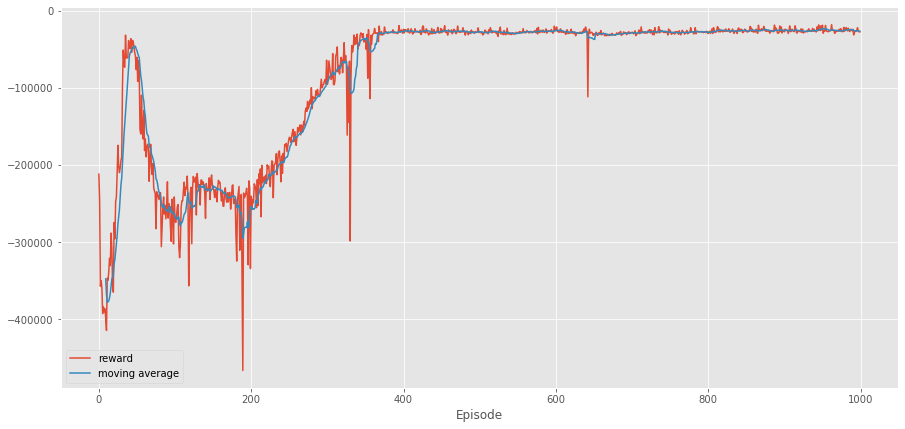

In [9]:
f, ax = plt.subplots(figsize=(15,7))
r.plot(ax=ax)
moving_avg.plot(ax=ax)
plt.xlabel('Episode')
plt.savefig('data/output/rewards_dynamic_dqn.png')

In [11]:
temperatures = pkl.load(open('data/output/DQN-Dyn-Price/2906093_dynamic_True_temperatures_dqn.pkl', "rb"))

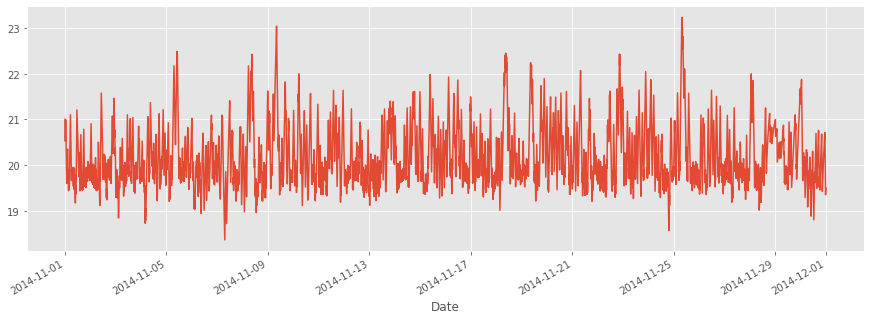

In [12]:
temperatures_df = pd.DataFrame()
temperatures_df['trained'] = temperatures[-2]
temperatures_df['Date'] = pd.date_range(start='2014-11-01',end='2014-12-01', periods=len(temperatures_df['trained']))

temperatures_df.index = temperatures_df['Date']

plt.figure(figsize=(15,5))
temperatures_df.iloc[:,:].loc[:,'trained'].plot()
#plt.savefig('data/output/temperatures_dynamic_dqn.png')

### Evaluation on January

In [11]:
eval_data = pkl.load(open('data/output/DQN-Dyn-Price/Dyn_Price_HighComfort_eval.pkl', 'rb'))

In [12]:
eval_data['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01', periods=len(eval_data))
eval_data.index = eval_data['Date']

In [13]:
eval_data

,Inside Temperatures,Ambient Temperatures,Prices,Actions,Rewards,Date
Date,,,,,,
2014-01-01 00:00:00,21.000000,2.118,15.15,0.0,0.000000,2014-01-01 00:00:00
2014-01-01 00:10:00,20.712611,2.118,15.15,0.0,-0.000000,2014-01-01 00:10:00
2014-01-01 00:20:00,20.429595,2.118,15.15,0.0,-0.000000,2014-01-01 00:20:00
2014-01-01 00:30:00,20.150888,2.118,15.15,0.0,-0.000000,2014-01-01 00:30:00
2014-01-01 00:40:00,19.876422,2.118,15.15,0.0,-0.000000,2014-01-01 00:40:00
...,...,...,...,...,...,...
2014-01-31 23:20:00,19.630548,-2.473,31.67,1.0,-10.556667,2014-01-31 23:20:00
2014-01-31 23:30:00,19.690605,-2.473,31.67,1.0,-10.556667,2014-01-31 23:30:00
2014-01-31 23:40:00,19.749748,-2.473,31.67,1.0,-10.556667,2014-01-31 23:40:00


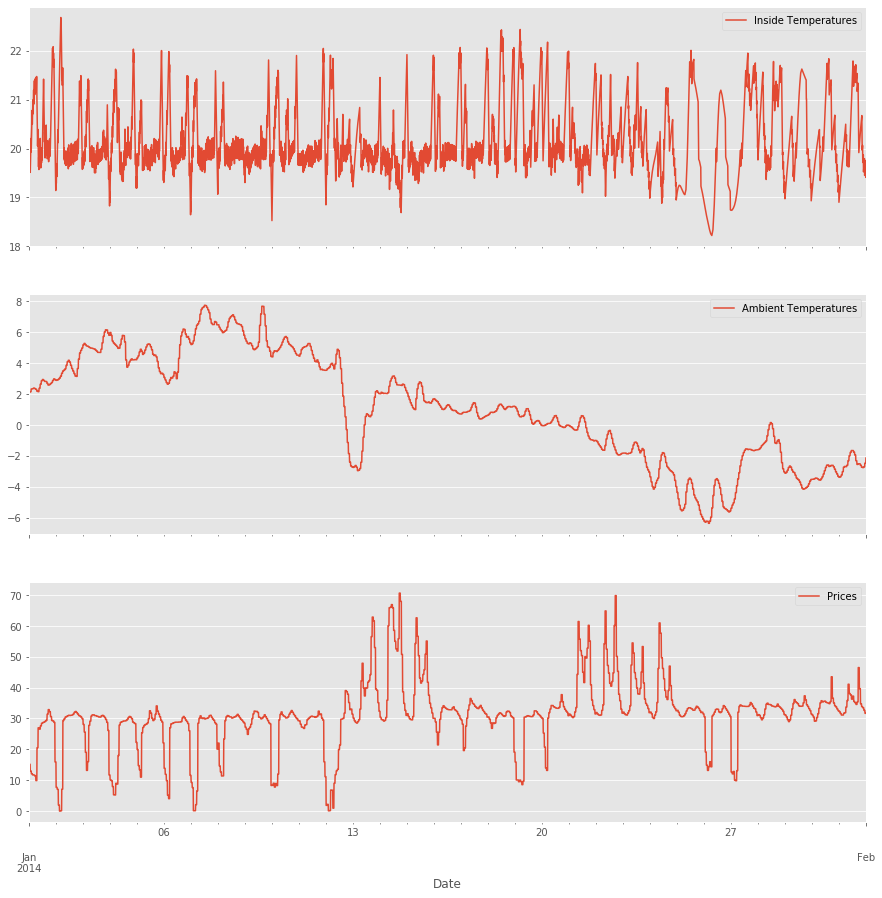

In [15]:
fig, axs = plt.subplots(3,figsize=(15,15), sharex=True)

zoomed_in = eval_data.iloc[:1008,:] # Taking first week for nicer visualization
eval_data['Inside Temperatures'].plot(ax=axs[0], legend=True)
eval_data['Ambient Temperatures'].plot(ax=axs[1], legend=True)
eval_data['Prices'].plot(ax=axs[2], legend=True)
plt.savefig('data/output/DQN-Dyn-Price/eval.png',bbox_inches='tight')

# DDPG

In [77]:
rewards = pkl.load(open('data/output/DDPG/3238021_dynamic_True_rewards_dqn.pkl', "rb"))

In [78]:
rewards[-1]

{'NUM_EPISODES': 4000,
 'EPSILON': 1,
 'EPS_DECAY': 0.9998,
 'LEARNING_RATE_ACTOR': 0.0001,
 'LEARNING_RATE_CRITIC': 0.001,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 8,
 'TIME_STEP_SIZE': 600,
 'NUM_HOURS': 24,
 'COMFORT_PENALTY': 10,
 'MEMORY_SIZE': 144000}

In [79]:
rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards[:-1]

In [80]:
r = rewards_df.fillna(rewards_df.mean())

In [81]:
moving_avg = r.rolling(window=10).mean()

In [82]:
moving_avg = moving_avg.rename(columns={'reward':'moving average'})

Text(0.5, 0, 'Episode')

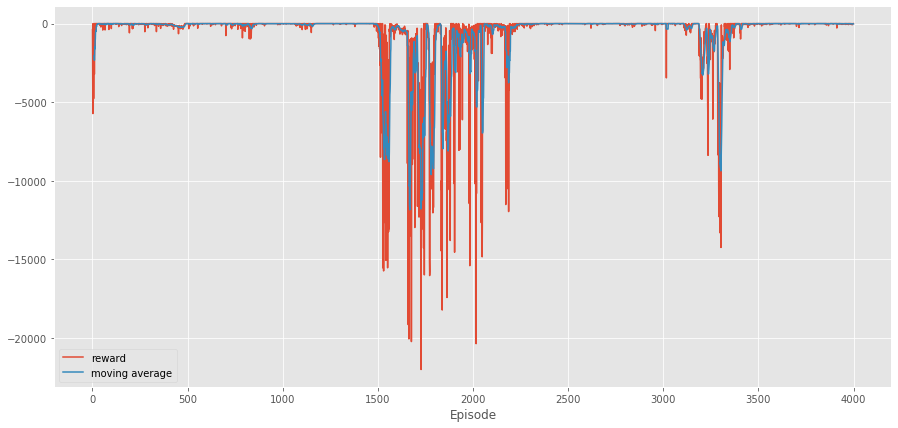

In [83]:
f, ax = plt.subplots(figsize=(15,7))
r.plot(ax=ax)
moving_avg.plot(ax=ax)
plt.xlabel('Episode')
#plt.savefig('data/output/rewards_dynamic_dqn.png')

In [13]:
eval_data = pkl.load(open('data/output/DDPG/DDPG_eval_eval.pkl', 'rb'))

In [14]:
eval_data['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01', periods=len(eval_data))
eval_data.index = eval_data['Date']
eval_data['Power'] = eval_data['Actions']*2000

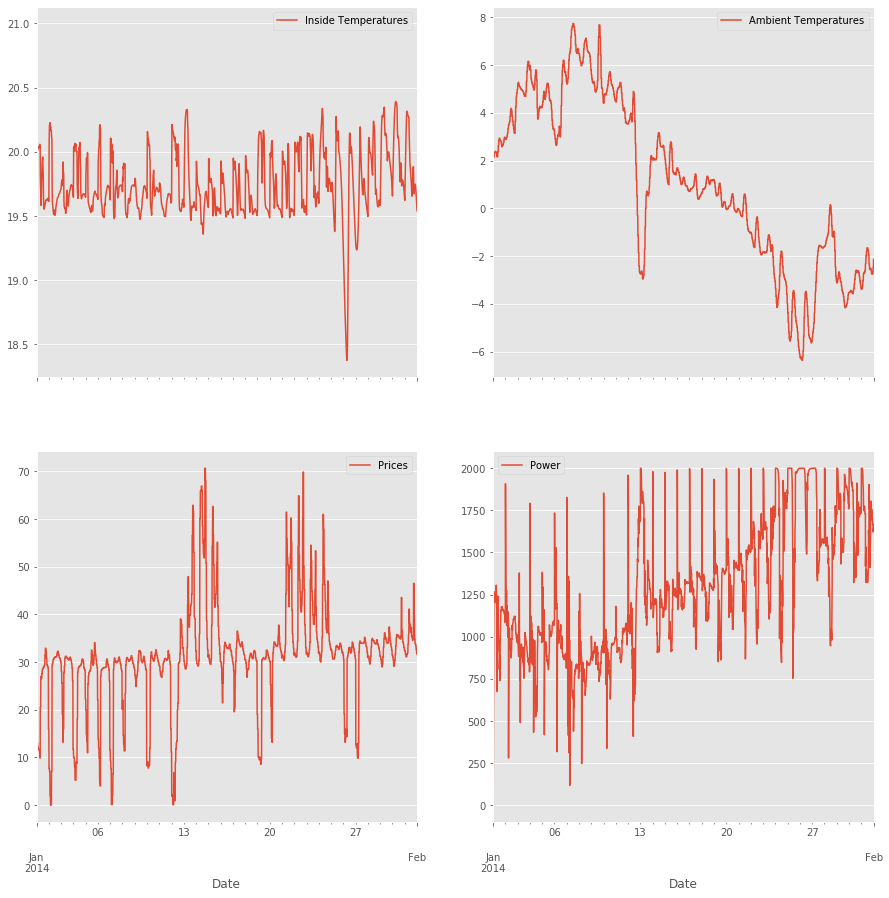

In [20]:
fig, axs = plt.subplots(3,figsize=(15,15) , sharex=True)

eval_data['Inside Temperatures'].plot(ax=axs[0], legend=True)
eval_data['Ambient Temperatures'].plot(ax=axs[1], legend=True)
eval_data['Prices'].plot(ax=axs[2], legend=True)
#plt.savefig('data/output/DDPG/DDPG_eval.png',bbox_inches='tight')

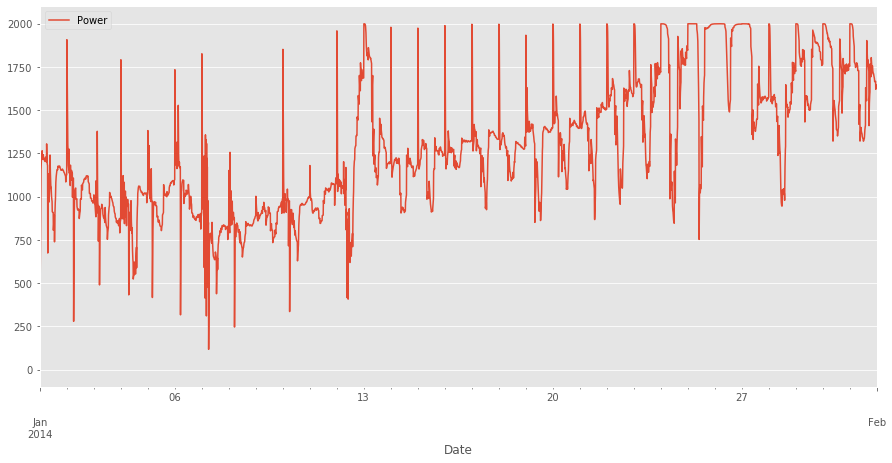

In [18]:
f, ax = plt.subplots(figsize=(15,7))
eval_data['Power'].plot(ax=ax, legend=True)
plt.savefig('data/output/DDPG/Power_profile_ddpg.png',bbox_inches='tight')

In [87]:
costs_ddpg = sum(2000*eval_data['Prices']/1e6*eval_data['Actions']*10*60/3600)

In [88]:
costs_ddpg

30.172001754492214

In [57]:
policy_data = pkl.load(open('data/output/DDPG/DDPGpolicy_eval.pkl', 'rb'))

In [58]:
policy_data

,Inside Temperatures,Ambient Temperatures,Prices,Actions
0,0.0,-10.0,0,1.0
1,0.0,-10.0,1,1.0
2,0.0,-10.0,2,1.0
3,0.0,-10.0,3,1.0
4,0.0,-10.0,4,1.0
...,...,...,...,...
2099995,29.9,9.9,30,0.0
2099996,29.9,9.9,31,0.0
2099997,29.9,9.9,32,0.0
2099998,29.9,9.9,33,0.0


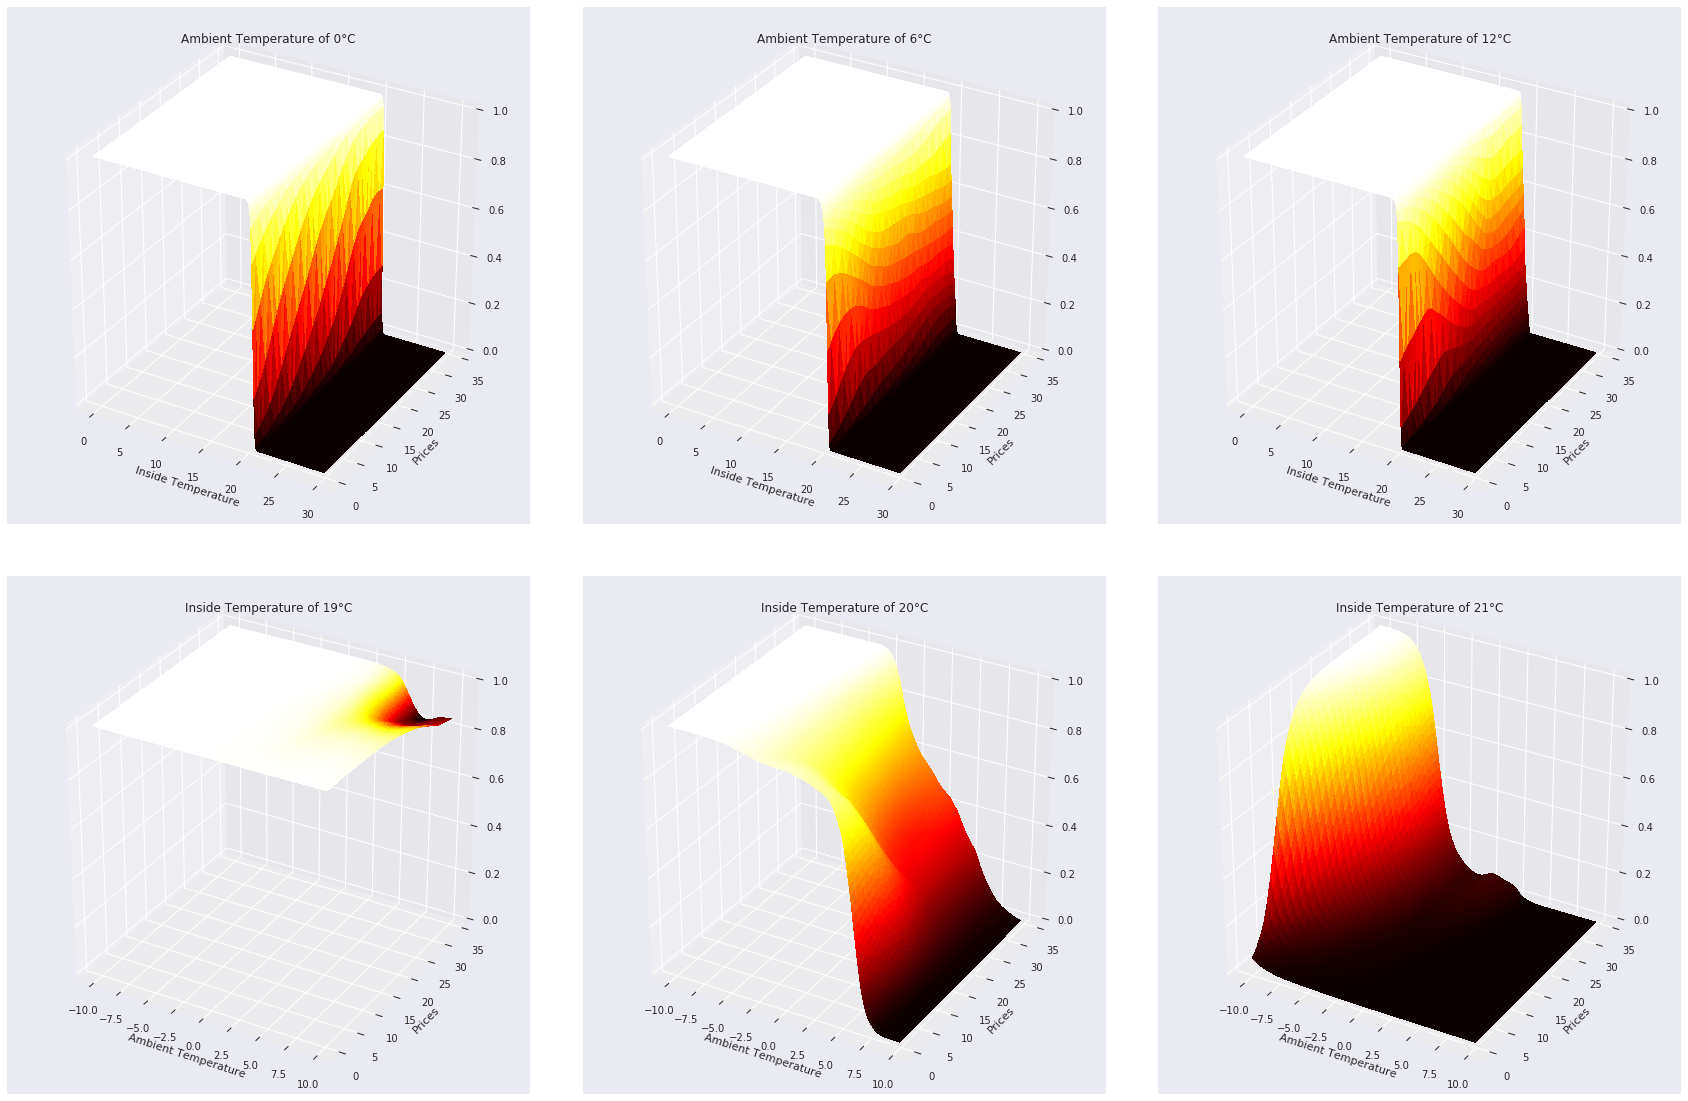

In [62]:
import numpy as np
fig = plt.figure(figsize=(30,20))

selected_temperatures = [-5, 0, 5]

for i in range(3):
    selected = policy_data[(np.round(policy_data['Ambient Temperatures'],1) == selected_temperatures[i])]
    X = selected['Inside Temperatures']
    Y = selected['Prices']
    Z = selected['Actions']
    ax = fig.add_subplot(2, 3, i+1, projection='3d')

    ax.plot_trisurf(X, Y, Z, cmap=cm.hot,
                       linewidth=0, antialiased=False)
    #selected.plot.scatter(x='Sun Power', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[0][i], vmin=-1, vmax=1)
    ax.set_title('Ambient Temperature of {}°C'.format(selected_temperatures[i]))
    ax.set_xlabel('Inside Temperature')
    ax.set_ylabel('Prices')
    #ax.set_zlabel('Actions')
    ax.set_zlim(0, 1)
    #ax.zaxis._axinfo['label']['space_factor'] = 50
    
selected_temperatures = [19, 20, 21]

for i in range(3):
    selected = policy_data[(np.round(policy_data['Inside Temperatures'],1) == selected_temperatures[i])]
    #selected.plot.scatter(x='Time', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[1][i], vmin=-1, vmax=1)
    X = selected['Ambient Temperatures']
    Y = selected['Prices']
    Z = selected['Actions']
    ax = fig.add_subplot(2, 3, i+4, projection='3d')

    ax.plot_trisurf(X, Y, Z, cmap=cm.hot,
                       linewidth=0, antialiased=False)
    #selected.plot.scatter(x='Sun Power', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[0][i], vmin=-1, vmax=1)
    ax.set_title('Inside Temperature of {}°C'.format(selected_temperatures[i]))
    #ax.zaxis._axinfo['label']['space_factor'] = 2.8
    ax.set_xlabel('Ambient Temperature')
    ax.set_ylabel('Prices')
    #ax.set_zlabel('Actions')
    ax.set_zlim(0, 1)
    ax.xaxis._axinfo['label']['space_factor'] = 2.8
    
plt.subplots_adjust(wspace=0.1, hspace = 0.1)
    
plt.savefig('data/output/DDPG/DDPG_policy_eval_3D.png',bbox_inches='tight')

In [5]:
eval_data['Prices_kWh']=eval_data['Prices']/1000

In [22]:
sum(eval_data['Actions'])

2882.0

In [17]:
costs_dqn = sum(2000*eval_data['Prices']/1e6*eval_data['Actions']*10*60/3600)

In [18]:
costs_dqn

30.723966666666747

### Basic Controller on January

In [4]:
costs = pkl.load(open('data/output/DQN-Dyn-Price/dyn_prices_costs_basic.pkl', 'rb'))

In [6]:
sum(costs)

32.43607666666674

# Comparing performances

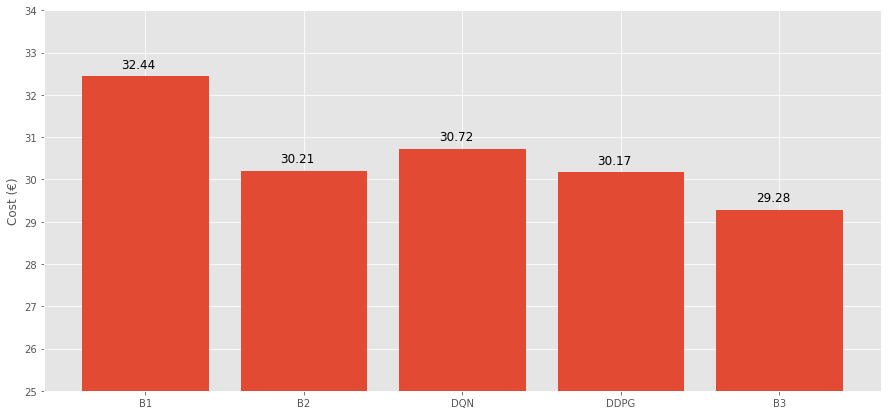

In [9]:
import numpy as np
basic_controller_cost = 32.43607666666674 # Based on previous analysis
binary_lp_cost = 30.205400000000264 # The binary linear programming problem
dqn_cost = 30.723966666666747 # Costs obtained with DQN
ddpg_cost = 30.172001754492214 # The costs obtained with DDPG
lp_cost = 29.278686824876633 # The continuous LP problem
labels_values = np.round(np.array([basic_controller_cost,binary_lp_cost, dqn_cost, ddpg_cost, lp_cost]), decimals=2)
costs = labels_values - 25
labels = ['B1', 'B2', 'DQN', 'DDPG', 'B3']


N=5
ind = np.arange(N)
f, ax = plt.subplots(figsize=(15,7))
ax.bar(ind, costs, bottom=25)
#moving_avg.plot(ax=ax)
ax.set_ylabel('Cost (€)')
ax.set_yticks(np.arange(25, 35, 1))
#ax.set_title('Cost incurred by the different solutions')
for i, v in enumerate(labels_values):
    ax.text(i-0.15, 
              v+0.2, 
              v, 
              fontsize=12)
ax.set_xticks(ind)
ax.set_xticklabels(labels)
plt.savefig('data/output/comparing_solutions_dyn_prices.png',bbox_inches='tight')

In [7]:
np.arange(25, 35, 1)

array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

# With storage capacity

In [16]:
rewards = pkl.load(open('data/output/DDPG_storage/7987364_dynamic_True_rewards_dqn.pkl', "rb"))

In [17]:
rewards[-1]

{'NUM_EPISODES': 1000,
 'EPSILON': 1,
 'EPS_DECAY': 0.997,
 'LEARNING_RATE_ACTOR': 0.0001,
 'LEARNING_RATE_CRITIC': 0.001,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 64,
 'TIME_STEP_SIZE': 3600,
 'NUM_HOURS': 744,
 'COMFORT_PENALTY': 10,
 'MEMORY_SIZE': 400000,
 'ETA_BATTERY': 0.95}

In [18]:
rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards[:-1]

In [19]:
r = rewards_df.fillna(rewards_df.mean())

In [20]:
moving_avg = r.rolling(window=10).mean()

In [21]:
moving_avg = moving_avg.rename(columns={'reward':'moving average'})

Text(0.5, 0, 'Episode')

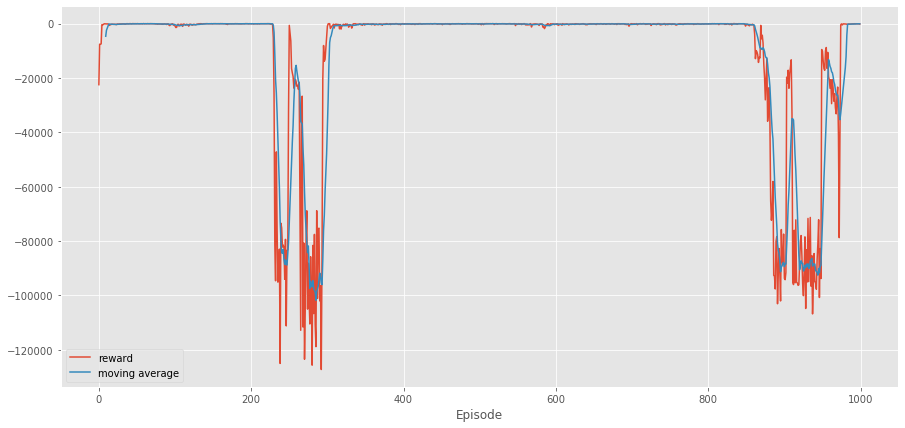

In [22]:
f, ax = plt.subplots(figsize=(15,7))
r.iloc[:,:].plot(ax=ax)
moving_avg.iloc[:,:].plot(ax=ax)
plt.xlabel('Episode')
#plt.savefig('data/output/rewards_dynamic_dqn.png')

## Evaluation on January

In [2]:
eval_data_sun = pkl.load(open('data/output/DDPG_storage/DDPG_storage_sun_eval.pkl', 'rb'))

In [14]:
eval_data = pkl.load(open('data/output/DDPG_storage/DDPG_storage_eval.pkl', 'rb'))

In [15]:
eval_data['Sun Power'] = eval_data_sun['Sun Power']/3

In [17]:
eval_data['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01', periods=len(eval_data))
eval_data.index = eval_data['Date']

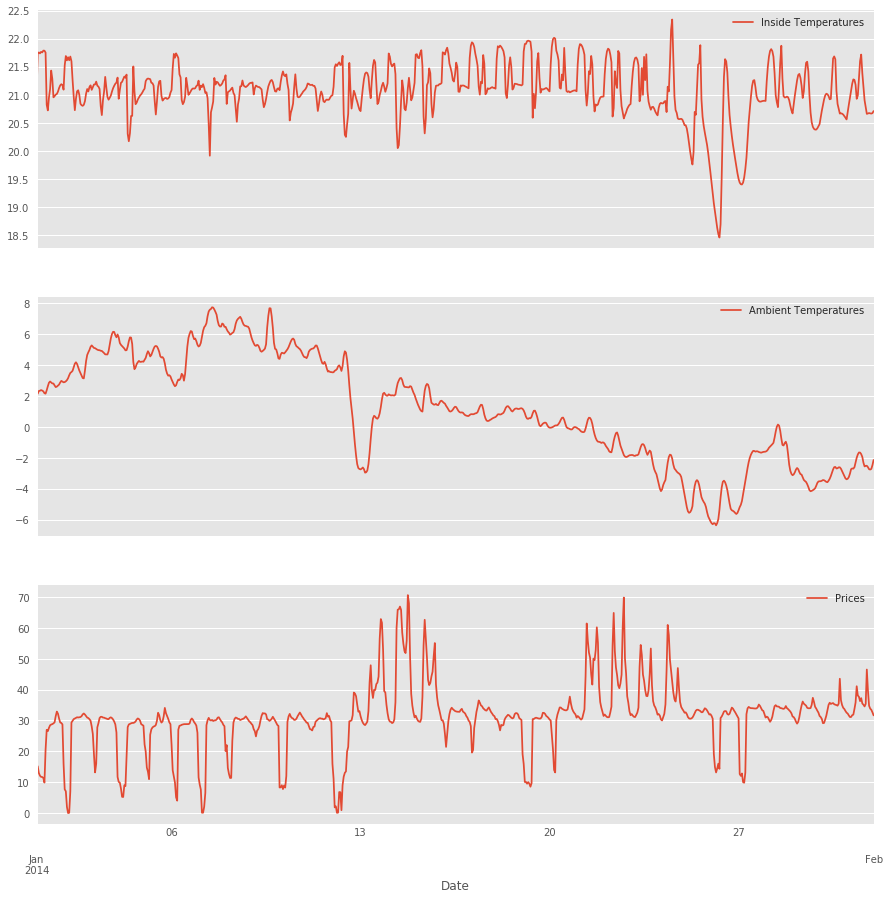

In [125]:
style.use("ggplot")
fig, axs = plt.subplots(3,figsize=(15,15), sharex=True)

eval_data['Inside Temperatures'].plot(ax=axs[0], legend=True)
eval_data['Ambient Temperatures'].plot(ax=axs[1], legend=True)
eval_data['Prices'].plot(ax=axs[2], legend=True)
#plt.savefig('data/output/DDPG_storage/DDPG_storage_eval.png',bbox_inches='tight')

In [6]:
costs_ddpg = sum(eval_data['Prices']*eval_data['Power'])

In [7]:
costs_ddpg

29.909655542042938

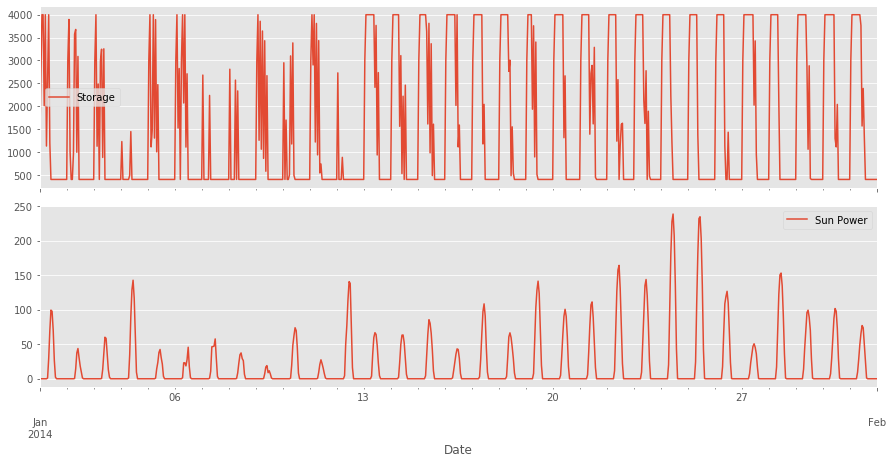

In [18]:
f, axs = plt.subplots(2,figsize=(15,7), sharex=True) #nrows=1, ncols=2,
eval_data['Storage'].plot(ax=axs[0], legend=True)
eval_data['Sun Power'].plot(ax=axs[1], legend=True)
plt.subplots_adjust(hspace=0.1)
#eval_data['Power from grid(W)'] = eval_data['Power']*1e6
#eval_data['Power from grid(W)'].plot(ax=axs[1], legend=True)
plt.savefig('data/output/DDPG_storage/DDPG_storage_power_profile.png',bbox_inches='tight')

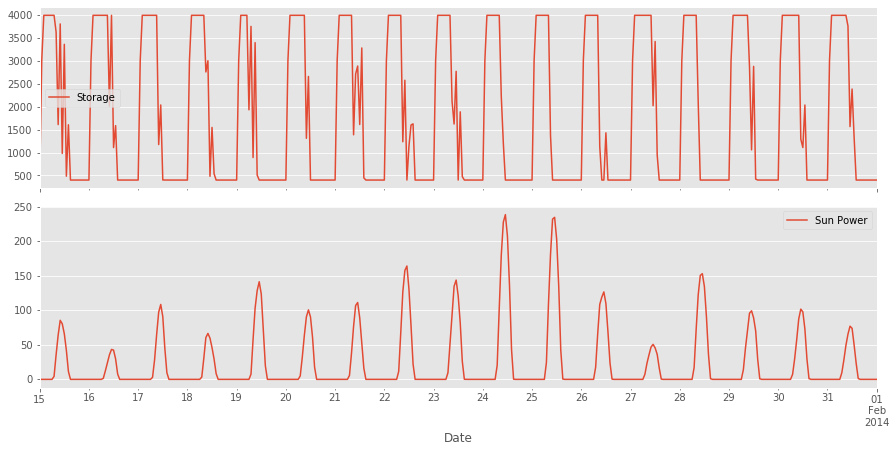

In [19]:
f, axs = plt.subplots(2,figsize=(15,7), sharex=True) #nrows=1, ncols=2,
plot_data = eval_data.iloc[14*24:]
plot_data['Storage'].plot(ax=axs[0], legend=True)
plot_data['Sun Power'].plot(ax=axs[1], legend=True)
plt.subplots_adjust(hspace=0.1)
#eval_data['Power from grid(W)'] = eval_data['Power']*1e6
#eval_data['Power from grid(W)'].plot(ax=axs[1], legend=True)
plt.savefig('data/output/DDPG_storage/DDPG_storage_power_zoom_profile.png',bbox_inches='tight')

## Policy Evaluation

In [97]:
policy_data = pkl.load(open('data/output/DDPG_storage/DDPG_storage_sunpolicy_eval.pkl', 'rb'))

In [105]:
#policy_data = policy_data[policy_data['Sun Power'] <= 250]

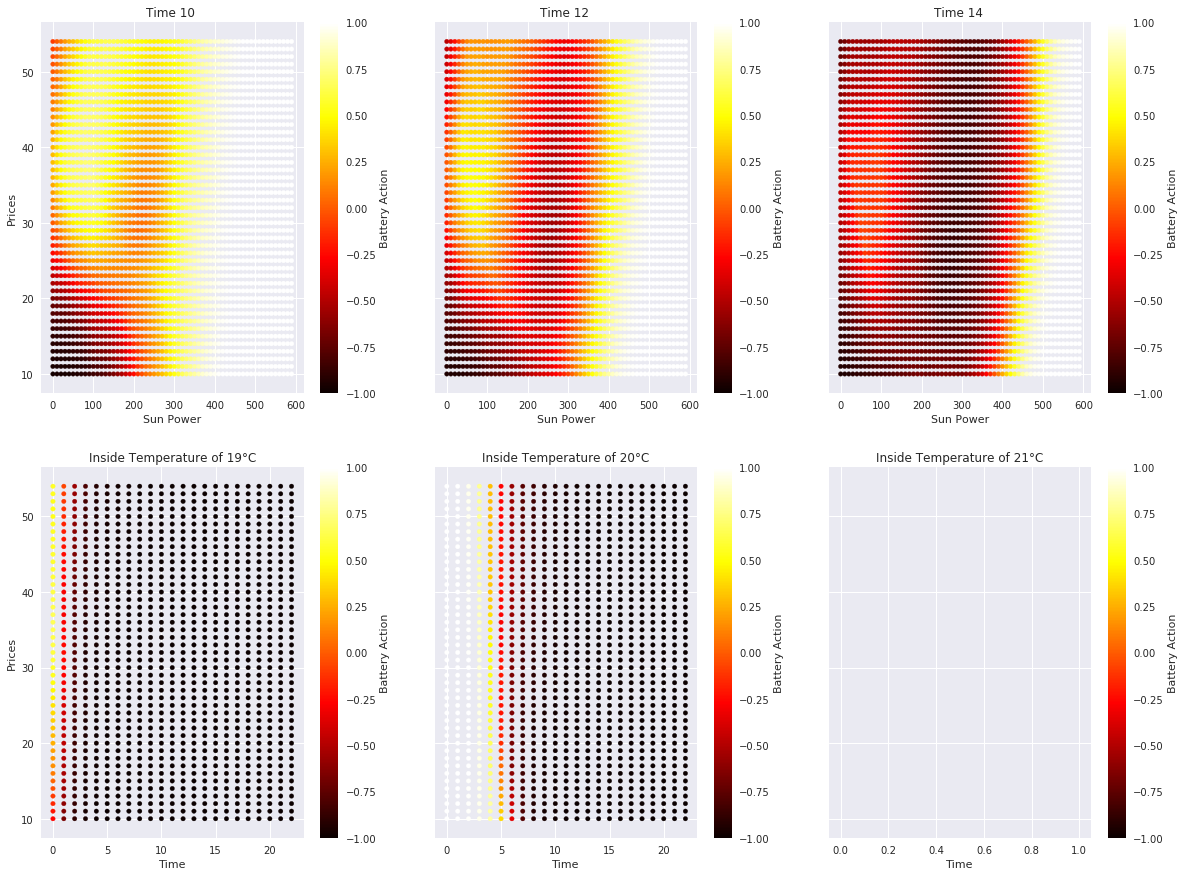

In [116]:
style.use('seaborn')
import numpy as np
fig, axs = plt.subplots(2,3,figsize=(20,15), sharey=True)

selected_times = [10, 12,14]

for i in range(3):
    selected = policy_data[(policy_data['Time'] == selected_times[i]) & (policy_data['Inside Temperatures'] == 20) & (np.round(policy_data['Ambient Temperatures'],1) == 4) & (np.round(policy_data['Battery Level'],1) == 1000)]
    selected.plot.scatter(x='Sun Power', y = 'Prices',c='Battery Action', colormap='hot', colorbar='False', ax = axs[0][i], vmin=-1, vmax=1)
    axs[0][i].set_title('Time {} '.format(selected_times[i]))
    
selected_temperatures = [19, 20, 21]

for i in range(3):
    selected = policy_data[(policy_data['Sun Power'] == 500) & (np.round(policy_data['Inside Temperatures'],1) == selected_temperatures[i]) & (np.round(policy_data['Ambient Temperatures'],1) == -4) & (np.round(policy_data['Battery Level'],1) == 1000)]
    selected.plot.scatter(x='Time', y = 'Prices',c='Battery Action', colormap='hot', colorbar='False', ax = axs[1][i], vmin=-1, vmax=1)
    axs[1][i].set_title('Inside Temperature of {}°C'.format(selected_temperatures[i]))

selected_storage = [1000, 2000, 4000]

#for i in range(3):
#    selected = policy_data[(policy_data['Sun Power'] == 100) & (np.round(policy_data['Inside Temperatures'],1) == 20) & (np.round(policy_data['Ambient Temperatures'],1) == -4) & (np.round(policy_data['Battery Level'],1) == selected_storage[i])]
#    selected.plot.scatter(x='Time', y = 'Prices',c='Battery Action', colormap='hot', colorbar='False', ax = axs[2][i], vmin=-1, vmax=1)
#    axs[2][i].set_title('Battery level of {} Wh'.format(selected_storage[i]))
#fig.colorbar(ims[0], ax=axs)
#plt.savefig('data/output/DDPG_storage/DDPG_storage_policy_eval3D.png',bbox_inches='tight')

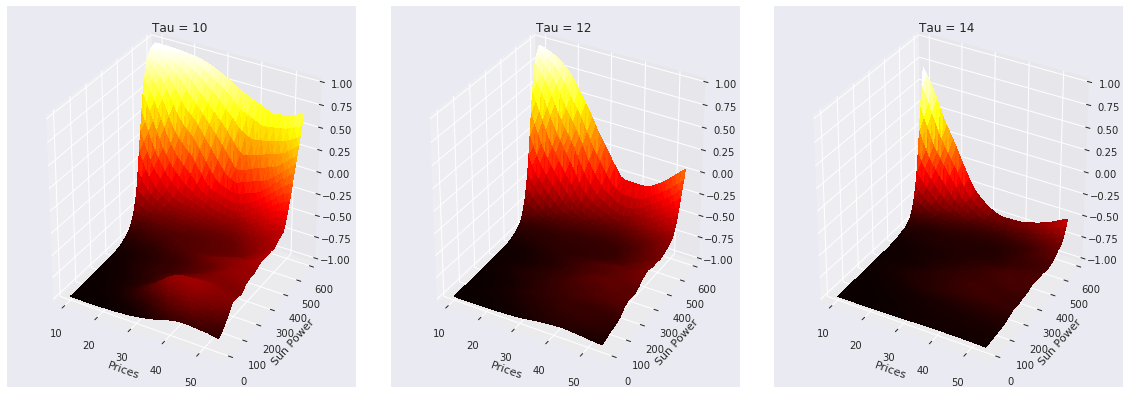

In [121]:
import numpy as np
fig = plt.figure(figsize=(20,7))

selected_times = [10, 12,14]

for i in range(3):
    selected = policy_data[(policy_data['Time'] == selected_times[i]) & (policy_data['Inside Temperatures'] == 20) & (np.round(policy_data['Ambient Temperatures'],1) == 0) & (np.round(policy_data['Battery Level'],1) == 1000)]
    Y = selected['Sun Power']
    X = selected['Prices']
    Z = selected['Battery Action']
    ax = fig.add_subplot(1, 3, i+1, projection='3d')

    ax.plot_trisurf(X, Y, Z, cmap=cm.hot,
                       linewidth=0, antialiased=False)
    #selected.plot.scatter(x='Sun Power', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[0][i], vmin=-1, vmax=1)
    ax.set_title('Tau = {} '.format(selected_times[i]))
    ax.xaxis._axinfo['label']['space_factor'] = 2.8
    ax.yaxis._axinfo['label']['space_factor'] = 2.8
    ax.set_xlabel('Prices')
    ax.set_ylabel('Sun Power')
    #ax.set_zlabel('Actions')
    ax.set_zlim(-1, 1)
    #ax.zaxis._axinfo['label']['space_factor'] = 50
    
#selected_sun = [0, 100, 150]

#for i in range(3):
#    selected = policy_data[(policy_data['Sun Power'] == selected_sun[i]) & (np.round(policy_data['Inside Temperatures'],1) == 20) & (np.round(policy_data['Ambient Temperatures'],1) == 0) & (np.round(policy_data['Prices'],0) == 40)]
#    #selected.plot.scatter(x='Time', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[1][i], vmin=-1, vmax=1)
#    X = selected['Time']
#    Y = selected['Battery Level']
#    Z = selected['Battery Action']
#    ax = fig.add_subplot(2, 3, i+4, projection='3d')
#
#    ax.plot_trisurf(X, Y, Z, cmap=cm.hot,
#                       linewidth=0, antialiased=False)
#    #selected.plot.scatter(x='Sun Power', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[0][i], vmin=-1, vmax=1)
#    ax.set_title('Sun power of {} W/m2'.format(selected_sun[i]))
#    #ax.zaxis._axinfo['label']['space_factor'] = 2.8
#    ax.xaxis._axinfo['label']['space_factor'] = 2.8
#    ax.yaxis._axinfo['label']['space_factor'] = 2.8
#    ax.set_xlabel('Tau')
#    ax.set_ylabel('Battery Level')
#    #ax.set_zlabel('Actions')
#    ax.set_zlim(-1, 1)
    
    

    
plt.subplots_adjust(wspace=0.1)
    
#fig.colorbar(ims[0], ax=axs)
plt.savefig('data/output/DDPG_storage/DDPG_storage_sun_policy_eval3D.png',bbox_inches='tight')

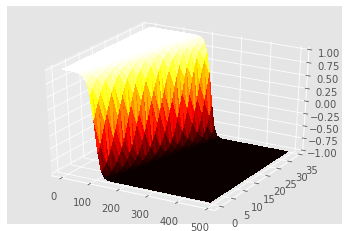

In [76]:
data = policy_data[(policy_data['Time'] == 0) & (policy_data['Inside Temperatures'] == 20)& (np.round(policy_data['Ambient Temperatures'],1) == -4)]
X = data['Sun Power']
Y = data['Prices']
Z = data['Actions']

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_trisurf(X, Y, Z, cmap=cm.hot,
                       linewidth=0, antialiased=False)

In [71]:
data = policy_data[(policy_data['Time'] == 0) & (policy_data['Inside Temperatures'] == 20)& (np.round(policy_data['Ambient Temperatures'],1) == -4)]
X = data['Sun Power'].sort_values().unique()
Y = data['Prices'].sort_values().unique()
Z = np.zeros((len(Y),len(X)))
X, Y = np.meshgrid(X, Y)



for y_ind, y in enumerate(data['Prices'].sort_values().unique()):
    for x_ind, x in enumerate(data['Sun Power'].sort_values().unique()):
        Z[y_ind, x_ind] = data.loc[(data['Sun Power'] == x) & (data['Prices'] == y),'Actions']
        #print(data.loc[(data['Time'] == x) & (data['Prices'] == y),'Actions'])
#Z = np.sin(R)

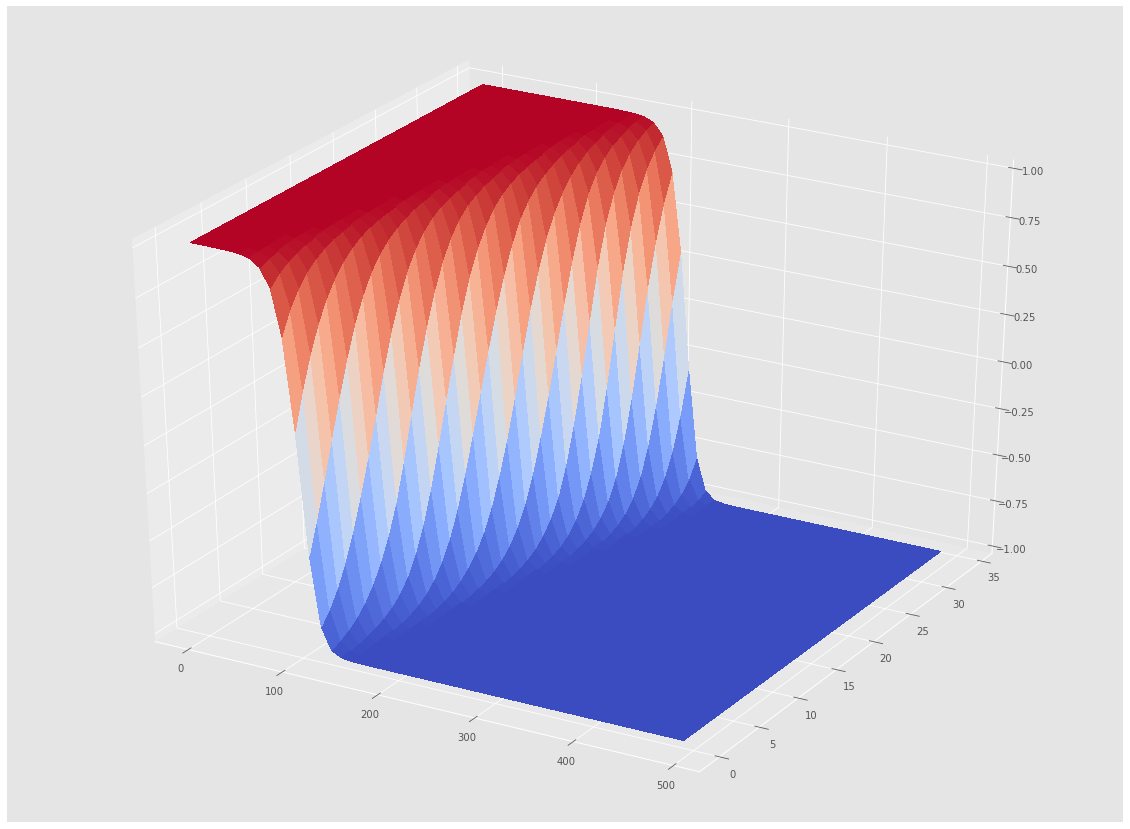

In [74]:

fig = plt.figure(figsize=(20,15))
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

## Comparing against LP

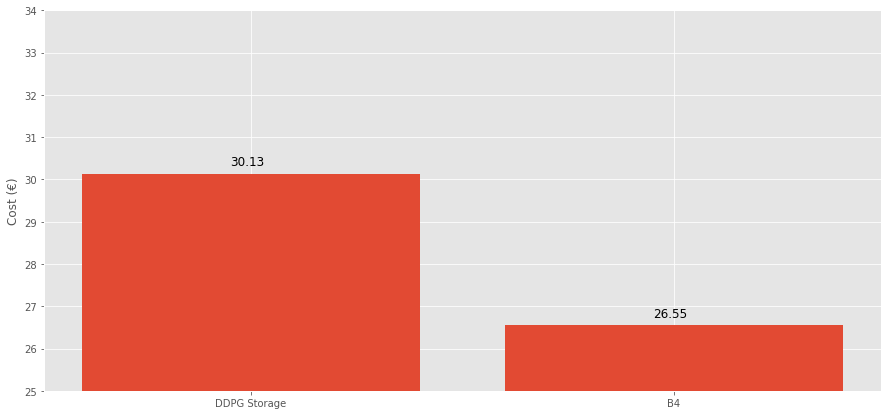

In [29]:
import numpy as np
storage_cost = 30.12609476634605
LP_optimal_solution = 26.55489972445432
labels_values = np.round(np.array([storage_cost,LP_optimal_solution]), decimals=2)
costs = labels_values - 25
labels = ['DDPG Storage', 'B4']


N=2
ind = np.arange(N)
f, ax = plt.subplots(figsize=(15,7))
ax.bar(ind, costs, bottom=25)
#moving_avg.plot(ax=ax)
ax.set_ylabel('Cost (€)')
ax.set_yticks(np.arange(25, 35, 1))
#ax.set_title('Cost incurred by the different solutions')
for i, v in enumerate(labels_values):
    ax.text(i-0.05, 
              v+0.2, 
              v, 
              fontsize=12)
ax.set_xticks(ind)
ax.set_xticklabels(labels)
plt.savefig('data/output/DDPG_storage/comparing_ddpg_vs_lp.png',bbox_inches='tight')

In [88]:
LP_data = pkl.load(open('data/output/DDPG_storage/LP_output_storage.pkl', 'rb'))

In [3]:
LP_data

,Battery State,Heating Action,Charging Action,Discharging Action,Inside Temperature
0,1000.00000,0.000000,0.0,0.000000,21.000000
1,821.62246,169.458663,0.0,169.458663,19.500000
2,821.62246,1196.284036,0.0,0.000000,19.500000
3,821.62246,1179.468299,0.0,0.000000,19.500000
4,821.62246,1185.759123,0.0,0.000000,19.510887
...,...,...,...,...,...
739,400.00000,1691.880538,0.0,551.317783,19.500000
740,400.00000,1702.691798,0.0,0.000000,19.500000
741,400.00000,1718.221010,0.0,0.000000,19.500000
742,400.00000,1721.218871,0.0,0.000000,19.500000


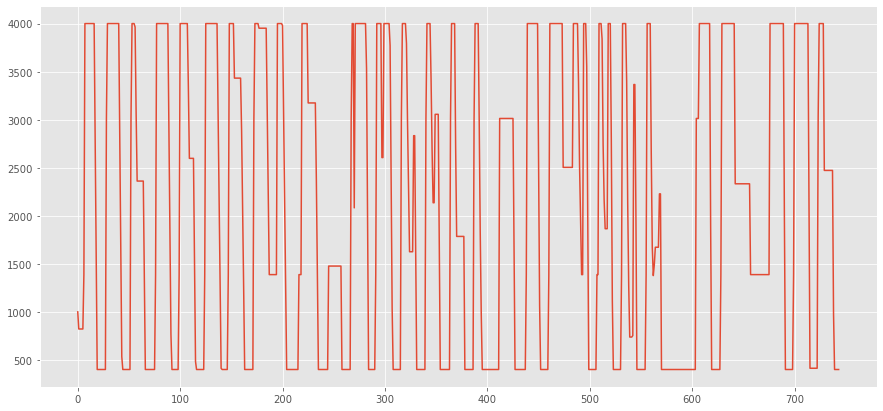

In [4]:
f, ax = plt.subplots(figsize=(15,7))
LP_data['Battery State'].plot(ax=ax)

In [89]:
weather = pd.read_csv('data/environment/ninja_weather_55.6838_12.5354_uncorrected.csv',header=3)
time = pd.to_datetime(weather.iloc[0:744+1,:].local_time, infer_datetime_format=True)
LP_data['date'] = time

In [90]:
LP_data['hour'] = LP_data['date'].dt.hour

In [91]:
LP_data['charging'] = (LP_data['Charging Action'] > 0)*1
LP_data['discharging'] = (LP_data['Discharging Action'] > 0)*1

In [92]:
grouped_by_hour = LP_data.groupby('hour')[['charging','discharging']].sum()

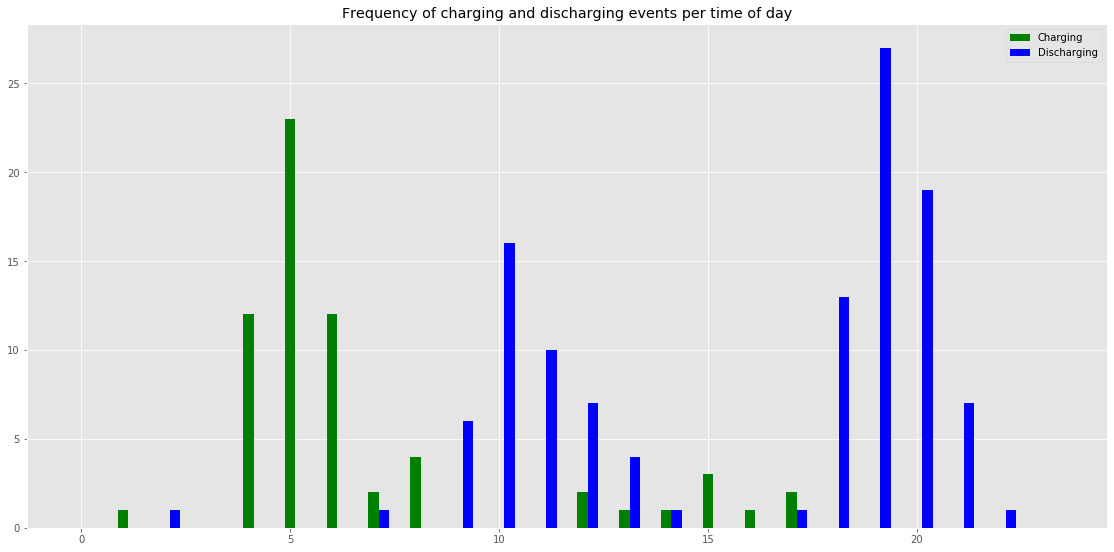

In [21]:
X = np.arange(24)
fig = plt.figure(figsize=(15,7))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, grouped_by_hour['charging'], color = 'g', width = 0.25)
ax.bar(X + 0.25, grouped_by_hour['discharging'], color = 'b', width = 0.25)
ax.legend(labels=['Charging', 'Discharging'])
plt.title('Frequency of charging and discharging events per time of day')
plt.savefig('data/output/DDPG_storage/LP_solution_policy.png',bbox_inches='tight')

### With exagerated sun powers

In [134]:
LP_data = pkl.load(open('data/output/DDPG_storage/LP_output_sun_storage.pkl', 'rb'))

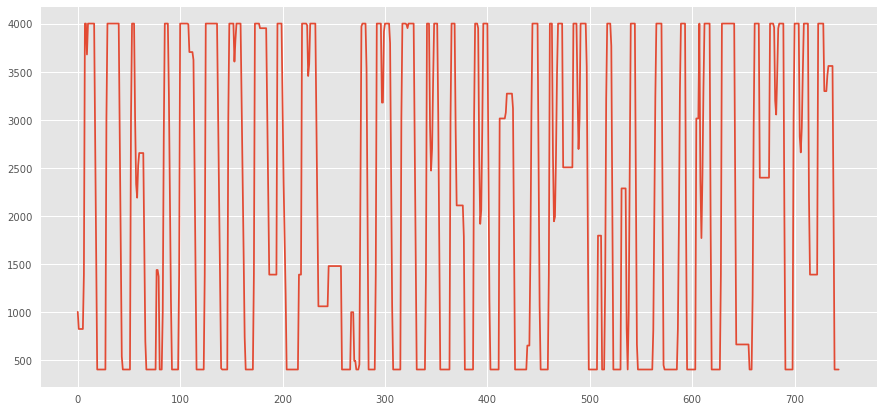

In [136]:
weather = pd.read_csv('data/environment/ninja_weather_55.6838_12.5354_uncorrected.csv',header=3)
time = pd.to_datetime(weather.iloc[0:744+1,:].local_time, infer_datetime_format=True)
LP_data['date'] = time

initial_day = 0
sun_powers = pd.read_csv('data/environment/ninja_weather_55.6838_12.5354_uncorrected.csv',
                                                header=3).iloc[initial_day*24:initial_day*24+744+1,3].reset_index(drop=True) * 3

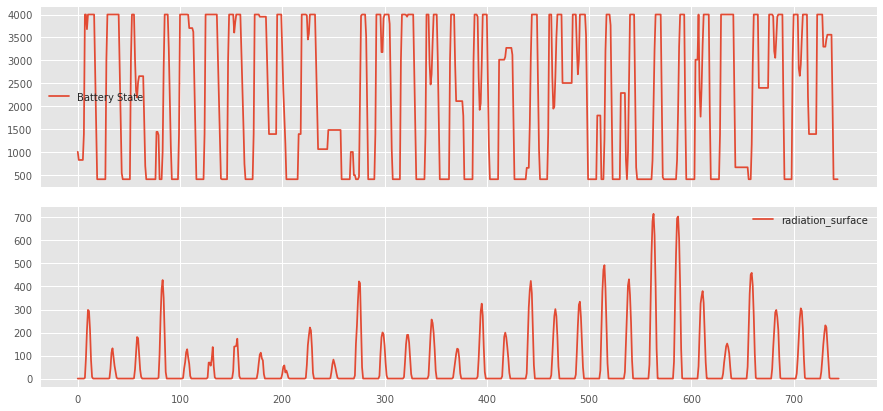

In [137]:
f, axs = plt.subplots(2,figsize=(15,7), sharex=True) #nrows=1, ncols=2,
LP_data['Battery State'].plot(ax=axs[0], legend=True)
sun_powers.plot(ax=axs[1], legend=True)
plt.subplots_adjust(hspace=0.1)

In [139]:
LP_data['hour'] = LP_data['date'].dt.hour
LP_data['charging'] = (LP_data['Charging Action'] > 0)*1
LP_data['discharging'] = (LP_data['Discharging Action'] > 0)*1
grouped_by_hour = LP_data.groupby('hour')[['charging','discharging']].sum()

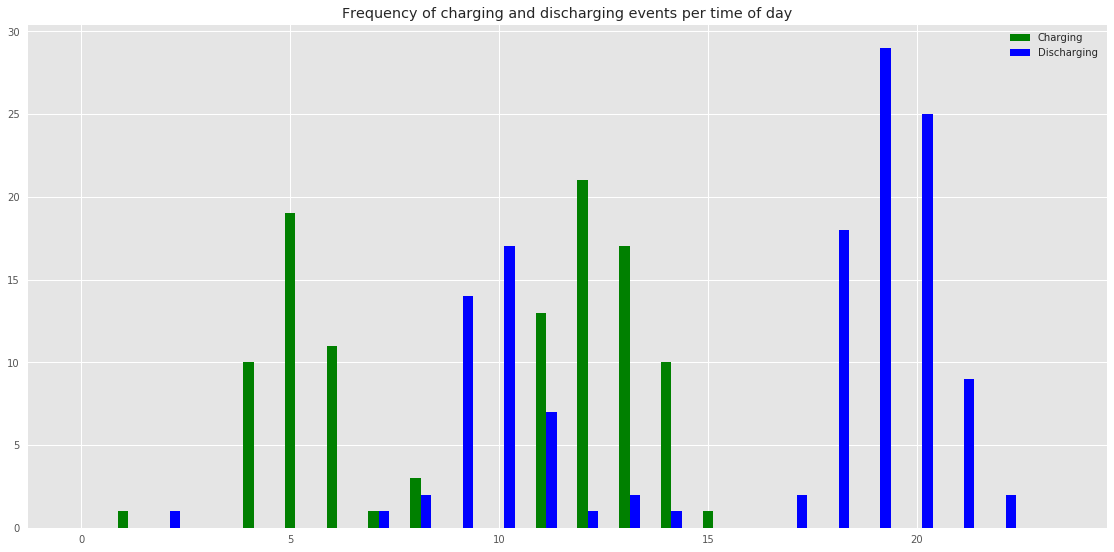

In [140]:
X = np.arange(24)
fig = plt.figure(figsize=(15,7))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, grouped_by_hour['charging'], color = 'g', width = 0.25)
ax.bar(X + 0.25, grouped_by_hour['discharging'], color = 'b', width = 0.25)
ax.legend(labels=['Charging', 'Discharging'])
plt.title('Frequency of charging and discharging events per time of day')
plt.savefig('data/output/DDPG_storage/LP_solution_sun_policy.png',bbox_inches='tight')